In [7]:
# The directory here should come with all necessary packages loaded in here
# Make sure you downloaded all of the packages in the "requirements.txt" file

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [8]:
# Input data files are available in the "data" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the data directory

from subprocess import check_output
print(check_output(["ls", "/Users/nathanfritter/myProjects/dataScience/myRepos/myersBriggsNLPAnalysis/data/"]).decode("utf8"))

mbti_1.csv
mbti_2.csv



In [9]:
# Any results you write to the current directory are saved as output.
unprocessed_data = '/Users/nathanfritter/myProjects/dataScience/myRepos/myersBriggsNLPAnalysis/data/mbti_1.csv'
random_data = '/Users/nathanfritter/myProjects/dataScience/myRepos/myersBriggsNLPAnalysis/data/mbti_random.csv'


# Basic stuff
columns = ['type', 'posts']
file = pd.read_csv(unprocessed_data)
print(file.columns)
print(file.shape)
print(file.head(5))
print(file.tail(5))

Index(['type', 'posts'], dtype='object')
(8675, 2)
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
      type                                              posts
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...


In [4]:
# How about filtering the words and seeing what happens
# This one will take a WHILE
# So buckle up and grab some popcorn
# And AWAYYYYY we go
# Took like 30 min damn
import csv
import re
from nltk import corpus
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
local_stopwords = []

# Tokenize words line by line
tokenizer = RegexpTokenizer(r'\w+')
i = 0
for index, line in file.iterrows():
    # Regular expressions
    line['posts'] = re.sub(r"(?:\@|https?\://)\S+", "", line['posts'])
    # Tokenize
    words = [word.lower() for word in tokenizer.tokenize(line['posts'])]
    words = [word for word in words if word not in stopwords.words('english') and word not in local_stopwords]
    line['posts'] = words
    if i % 100 == 0:
        print(i)
    i += 1

print(file.head(10))


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
   type                                              posts
0  INFJ  [intj, moments, sportscenter, top, ten, plays,...
1  ENTP  [finding, lack, posts, alarming, sex, boring, ...
2  INTP  [good, one, _____, course, say, know, blessing...
3  INTJ  [dear, intp, enjoyed, conversation, day, esote...
4  ENTJ  [fired, another, silly, misconception, approac...
5  INTJ  [18, 37, perfect, scientist, claims, scientifi...
6  INFJ  [draw, nails, haha, done, professionals, nails...
7  INTJ  [tend, build, collection, things, desktop, use...
8  INFJ  [sure, good, question, distinction, t

In [13]:
# Split data into posts and type
mbtitype = np.array(file['type'])
mbtiposts = np.array(file['posts'])

# Show unique labels
import nltk
unique, counts = np.unique(mbtitype, return_counts=True)
print(np.asarray((unique, counts)).T)
"""
# Get word frequencies
wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return wordlist
"""
words = []
for word in mbtiposts:
    words += word

word_features = nltk.FreqDist(words)
print("\nMost frequent words with counts:")
for word, frequency in word_features.most_common(25):
    print('%s;%d' % (word, frequency))
print("\n")

#print(word_features_train.most_common(25).keys())
#print(word_features_test.most_common(25).keys())

[['ENFJ' 190]
 ['ENFP' 675]
 ['ENTJ' 231]
 ['ENTP' 685]
 ['ESFJ' 42]
 ['ESFP' 48]
 ['ESTJ' 39]
 ['ESTP' 89]
 ['INFJ' 1470]
 ['INFP' 1832]
 ['INTJ' 1091]
 ['INTP' 1304]
 ['ISFJ' 166]
 ['ISFP' 271]
 ['ISTJ' 205]
 ['ISTP' 337]]

Most frequent words with counts:
 ;10945065
e;5366171
t;4270910
o;3695183
a;3472587
n;3087742
i;3020055
s;2812919
r;2318179
h;2216163
l;1956951
.;1538935
d;1522228
u;1478875
m;1294630
y;1271623
|;1243752
c;1074780
g;999739
w;954073
f;898898
p;863957
I;783780
b;694343
v;523064




<class 'list'>
<class 'numpy.ndarray'>


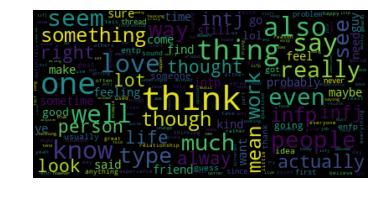

In [14]:
words = []
for word in mbtiposts:
    words += word

# Now to make bar graphs
# plt.plot(file['type'], type = 'bar')
from wordcloud import WordCloud
from os import path

#direc = path.dirname(__file__)
#text = open(file['posts']).read()
print(type(words))
print(type(mbtiposts))

wordcloud_words = " ".join(words)
# Lower max font size
wordcloud = WordCloud(max_font_size = 40).generate(wordcloud_words)
plt.figure()
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [15]:
# Import libraries for model selection and feature extraction
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, chi2

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
mbtiposts, mbtitype, test_size=0.33, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

5812
2863
5812
2863


In [16]:
# Extract features from text files
count_vect = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X_train_counts = count_vect.fit_transform(X_train)
print(X_train_counts.shape)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(5812, 87237)
(5812, 87237)


In [12]:
# Training a classifer
clf = MultinomialNB().fit(X_train_tfidf, y_train)
INTJ_sentence = ['Writing college essays is stressful because I have to give a stranger a piece of myself and that piece has to incorporate all of who I am']
INTJ_X_new_counts = count_vect.transform(INTJ_sentence)
INTJ_X_new_tfidf = tfidf_transformer.transform(INTJ_X_new_counts)

ENFP_sentence = ['Our favorite friendships are the ones where you can go from talking about the latest episode of the Bachelorette to the meaning of life']
ENFP_X_new_counts = count_vect.transform(ENFP_sentence)
ENFP_X_new_tfidf = tfidf_transformer.transform(ENFP_X_new_counts)
# Make a prediction of test sentence
predictedINTJ = clf.predict(INTJ_X_new_tfidf)
predictedENFP = clf.predict(ENFP_X_new_tfidf)
for words, category in zip(INTJ_sentence, predictedINTJ):
    print('%r => %s' % (INTJ_sentence, category))
for words, category in zip(ENFP_sentence, predictedENFP):
    print('%r => %s' % (ENFP_sentence, category))

['Writing college essays is stressful because I have to give a stranger a piece of myself and that piece has to incorporate all of who I am'] => INFP
['Our favorite friendships are the ones where you can go from talking about the latest episode of the Bachelorette to the meaning of life'] => INFP


In [18]:
# Naive Bayes model fitting and predictions
# Building a Pipeline; this does all of the work in extract_and_train() at once  
text_clf = Pipeline([('vect', CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)),
                     ('tfidf', TfidfTransformer()),
                     ('chi2', SelectKBest(chi2, k = 'all')),
                     ('clf', MultinomialNB()),
                     ])

text_clf = text_clf.fit(X_train, y_train)

# Evaluate performance on test set
predicted = text_clf.predict(X_test)
print("The accuracy of a Naive Bayes algorithm is: ") 
print(np.mean(predicted == y_test))
print("Number of mislabeled points out of a total %d points for the Naive Bayes algorithm : %d"
      % (X_test.shape[0],(y_test != predicted).sum()))


The accuracy of a Naive Bayes algorithm is: 
0.21655606007684247
Number of mislabeled points out of a total 2863 points for the Naive Bayes algorithm : 2243


In [29]:
# Tune parameters
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                  'tfidf__use_idf': (True, False),
                  'clf__alpha': (1e-2, 1e-3),
                  }

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

best_parameters, score, _ = max(gs_clf.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

print(score)


PicklingError: Can't pickle <function <lambda> at 0x13db92400>: attribute lookup <lambda> on __main__ failed

In [22]:
# Linear Support Vector Machine
# Build Pipeline again
text_clf_two = Pipeline([('vect', CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)),
                         ('tfidf', TfidfTransformer()),
                         ('chi2', SelectKBest(chi2, k = 'all')),
                         ('clf', SGDClassifier(
                             loss='hinge',
                             penalty='l2',
                             alpha=1e-3,
                             max_iter=5,
                             random_state=42)),
                        ])
text_clf_two = text_clf_two.fit(X_train, y_train)
predicted_two = text_clf_two.predict(X_test)
print("The accuracy of a Linear SVM is: ")
print(np.mean(predicted_two == y_test))
print("Number of mislabeled points out of a total %d points for the Linear SVM algorithm: %d"
      % (X_test.shape[0],(y_test != predicted_two).sum()))


The accuracy of a Linear SVM is: 
0.6681802305274188
Number of mislabeled points out of a total 2863 points for the Linear SVM algorithm: 950


In [30]:
# Tune parameters Linear Support Vector Machine
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                  'tfidf__use_idf': (True, False),
                  'clf__alpha': (1e-2, 1e-3),
                  }

gs_clf_two = GridSearchCV(text_clf_two, parameters, n_jobs=-1)
gs_clf_two = gs_clf_two.fit(X_train, y_train)

best_parameters, score, _ = max(gs_clf_two.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

print(score)

PicklingError: Can't pickle <function <lambda> at 0x1146fe2f0>: attribute lookup <lambda> on __main__ failed

In [27]:
# NEURAL NETWORK
text_clf_three = Pipeline([('vect', CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)),
                            ('tfidf', TfidfTransformer()),
                            ('chi2', SelectKBest(chi2, k = 'all')),
                            ('clf', MLPClassifier(
                                    hidden_layer_sizes=(25,), 
                                    max_iter=75, 
                                    alpha=1e-4,
                                    solver='sgd', 
                                    verbose=10, 
                                    tol=1e-4, 
                                    random_state=1,
                                    learning_rate_init=.1)),
                            ])

text_clf_three.fit(X_train, y_train)
print("Training set score: %f" % text_clf_three.score(X_train, y_train))
print("Test set score: %f" % text_clf_three.score(X_test, y_test))

Iteration 1, loss = 2.45720470
Iteration 2, loss = 2.26924138
Iteration 3, loss = 2.25061283
Iteration 4, loss = 2.21701155
Iteration 5, loss = 2.16075856
Iteration 6, loss = 2.06615436
Iteration 7, loss = 1.94524710
Iteration 8, loss = 1.81693062
Iteration 9, loss = 1.69088964
Iteration 10, loss = 1.57951086
Iteration 11, loss = 1.47546602
Iteration 12, loss = 1.37229250
Iteration 13, loss = 1.28167116
Iteration 14, loss = 1.20243728
Iteration 15, loss = 1.12281094
Iteration 16, loss = 1.05283294
Iteration 17, loss = 0.98954797
Iteration 18, loss = 0.93097424
Iteration 19, loss = 0.86818869
Iteration 20, loss = 0.81681657
Iteration 21, loss = 0.75860843
Iteration 22, loss = 0.71238649
Iteration 23, loss = 0.66479706
Iteration 24, loss = 0.62365370
Iteration 25, loss = 0.58057510
Iteration 26, loss = 0.54401638
Iteration 27, loss = 0.51047412
Iteration 28, loss = 0.48412693
Iteration 29, loss = 0.44996779
Iteration 30, loss = 0.41856109
Iteration 31, loss = 0.39528733
Iteration 32, los

/Users/nathanfritter/myProjects/dataScience/myRepos/myersBriggsNLPAnalysis/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.995354
Test set score: 0.652113


In [31]:
# Parameter Tuning
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
              }

gs_clf_three = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf_three = gs_clf_three.fit(X_train, y_train)


best_parameters, score, _ = max(gs_clf_three.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))


    print(score)


# Cross Validation Score
scores = cross_val_score(text_clf_three, X_train, y_train, cv = 5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

PicklingError: Can't pickle <function <lambda> at 0x13db92400>: attribute lookup <lambda> on __main__ failed